In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

<h4>Load the Titanic Dataset</h4>

In [2]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<h3>Univariate Analysis</h3>

<h4>What is the mean, median, and mode of the age column?</h4>

In [3]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
mean_age=df['age'].mean()
median_age=df['age'].median()
mode_age=df['age'].mode()

print("The mean is: ",mean_age)
print("The median is: ",median_age)
print("The mode is: ",mode_age)

The mean is:  29.69911764705882
The median is:  28.0
The mode is:  0    24.0
Name: age, dtype: float64


<h4>What is the trimmed mean of fare, removing the top and bottom 10% of values?</h4>

In [5]:
from scipy import stats
trimmed_mean_fare=stats.trim_mean(df['fare'],0.1)
print("The trimmed mean is: ",trimmed_mean_fare)

The trimmed mean is:  21.37871556802244


<h4>Calculate the weighted mean of fare, using pclass as the weight.</h4>

In [6]:
weighted_average=np.average(df['fare'],weights=df['pclass'])
print("Weighted Average is: ",weighted_average)

Weighted Average is:  22.3262912980068


<h4>What is the range, variance, standard deviation, and mean absolute deviation (MAD) of the age variable?</h4>

In [7]:
range=df['age'].max()-df['age'].min()
print("Range is: ",range)
print("Variance is: ",df['age'].var())
print("Std. Deviation is: ",df['age'].std())
mad = (df['age'] - mean_age).abs().mean()
print("Mean Absolute Deviation is: ",mad)


Range is:  79.58
Variance is:  211.01912474630802
Std. Deviation is:  14.526497332334042
Mean Absolute Deviation is:  11.322944471906409


<h4>Calculate the coefficient of variation (CV) for the fare column.</h4>

In [8]:
cv=(df['fare'].std()/df['fare'].mean())*100
print("Coefficient of Variation for fare is: ",cv)

Coefficient of Variation for fare is:  154.30725278408497


<h4>What are the quantiles (25%, 50%, 75%) and percentiles (10th, 90th) of fare?</h4>

In [9]:
print("25th percentile: ",np.quantile(df['fare'],0.25))
print("50th percentile: ",np.quantile(df['fare'],0.50))
print("75th percentile: ",np.quantile(df['fare'],0.75))
print("10th percentile: ",np.quantile(df['fare'],0.10))
print("90th percentile: ",np.quantile(df['fare'],0.90))

25th percentile:  7.9104
50th percentile:  14.4542
75th percentile:  31.0
10th percentile:  7.55
90th percentile:  77.9583


<h4>Display the five-number summary of age.</h4>

In [10]:
new_df=df['age'].dropna()
print("5 number summary")
print("Minimum Value: ",new_df.min())
print("25th percentile: ",np.quantile(new_df,0.25))
print("50th percentile: ",np.quantile(new_df,0.50))
print("75th percentile: ",np.quantile(new_df,0.75))
print("90th percentile: ",new_df.max())

5 number summary
Minimum Value:  0.42
25th percentile:  20.125
50th percentile:  28.0
75th percentile:  38.0
90th percentile:  80.0


<h3>Frequency Tables and Cumulative Frequency</h3>

<h4>Create a frequency table for the 'sex' and 'pclass' column.</h4>

In [11]:
print("Frequency Table")
print(pd.crosstab(df['sex'],'Count'))
print()
print(pd.crosstab(df['pclass'],'Count'))

Frequency Table
col_0   Count
sex          
female    314
male      577

col_0   Count
pclass       
1         216
2         184
3         491


<h4>Find the cumulative frequency for fare</h4>

In [12]:
print(pd.DataFrame(df['fare'].cumsum()))

           fare
0        7.2500
1       78.5333
2       86.4583
3      139.5583
4      147.6083
..          ...
886  28602.7493
887  28632.7493
888  28656.1993
889  28686.1993
890  28693.9493

[891 rows x 1 columns]


<h4>Create a histogram of age and overlay the cumulative distribution.</h4>

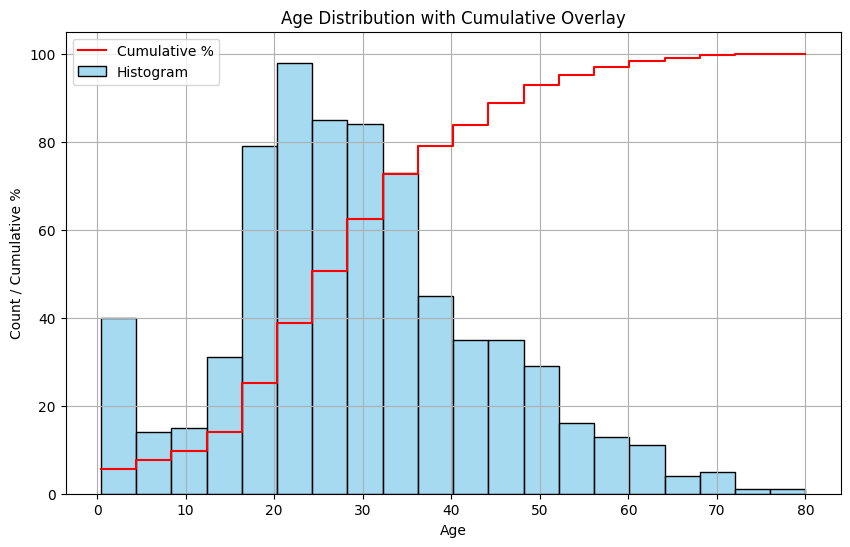

In [13]:
plt.figure(figsize=(10, 6))

# Regular histogram
sns.histplot(data=df, x='age', bins=20, color='skyblue', label='Histogram')

# Cumulative distribution (as line)
sns.histplot(data=df, x='age', bins=20, cumulative=True, stat='percent',
            element='step', fill=False, color='red', label='Cumulative %')

plt.title('Age Distribution with Cumulative Overlay')
plt.xlabel('Age')
plt.ylabel('Count / Cumulative %')
plt.legend()
plt.grid(True)
plt.show()


<h3>Bivariate Analysis</h3>

<h4>Compute the covariance between age and fare.</h4>

In [14]:
df['age'].fillna(mean_age,inplace=True)
data=np.vstack([df['age'],df['fare']])
cov=np.cov(data)
cov_xy=cov[0,1]
print("The covariance is: ",cov_xy)

The covariance is:  59.16220028968937


/var/folders/6b/1hdxxqbn1gx40rtc5xgkfkqc0000gn/T/ipykernel_3631/2088010684.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(mean_age,inplace=True)


<h4>Compute the Pearson correlation between age and fare.</h4>

In [15]:
cor=np.corrcoef(df['age'],df['fare'])
print("The correlation is: ",cor[1,0])

The correlation is:  0.0915660932850576


<h4>Which pair of numerical columns have the highest positive and negative correlation?</h4>

In [16]:
df2=df.select_dtypes(include=np.number)
df2.corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
sibsp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<h3>Data Visualization</h3>

<h4>Create histograms of age and fare with KDE plots.</h4>

/var/folders/6b/1hdxxqbn1gx40rtc5xgkfkqc0000gn/T/ipykernel_3631/2799180019.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


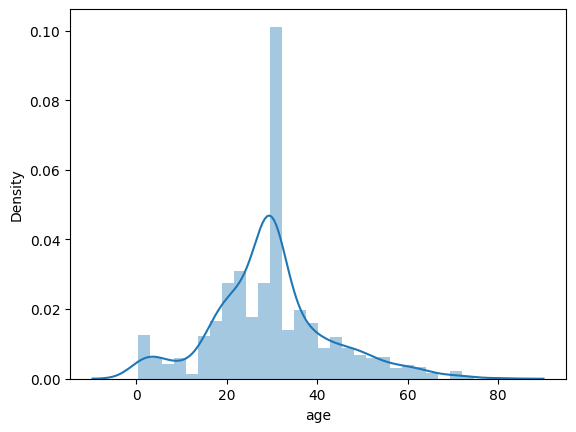

In [17]:
sns.distplot(df['age'])
plt.show()

/var/folders/6b/1hdxxqbn1gx40rtc5xgkfkqc0000gn/T/ipykernel_3631/1193692275.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fare'])


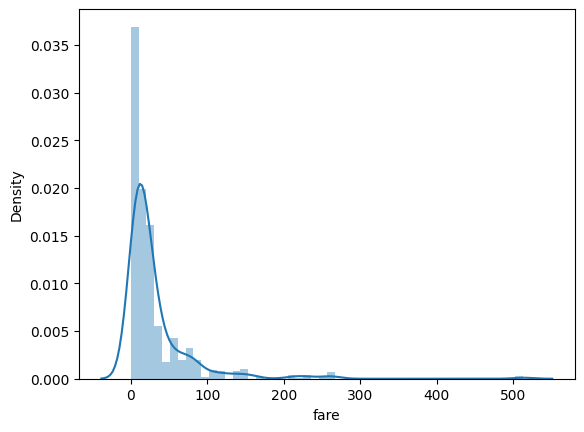

In [18]:
sns.distplot(df['fare'])
plt.show()

<h4>Create a boxplot of fare across different pclass levels.</h4>

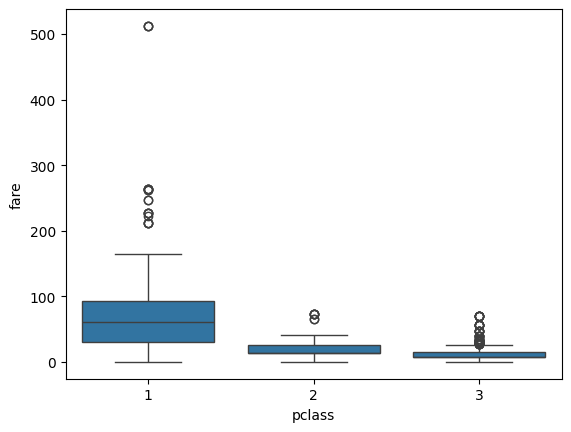

In [19]:
sns.boxplot(data=df,x=df['pclass'],y=df['fare'])
plt.show()

<h4>Draw a scatter plot showing the relationship between age and fare.</h4>

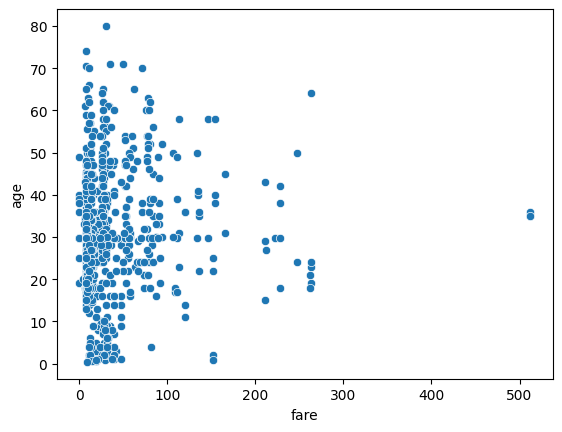

In [20]:
sns.scatterplot(data=df,x=df['fare'],y=df['age'])
plt.show()

<h4>Create a violin plot of age grouped by sex.</h4>

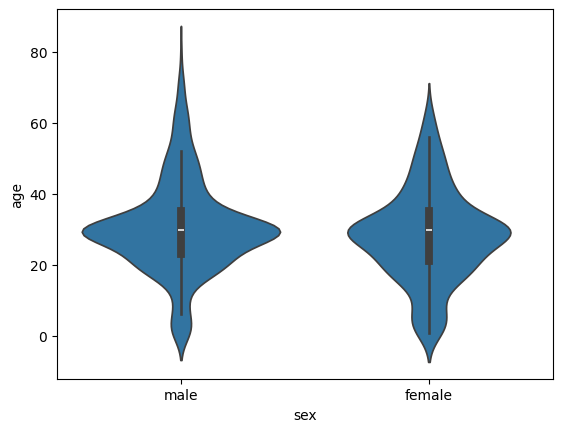

In [21]:
sns.violinplot(data=df,x=df['sex'],y=df['age'])
plt.show()

<h4>Create a pairplot of the numeric features to visualize all pairwise relationships.</h4>

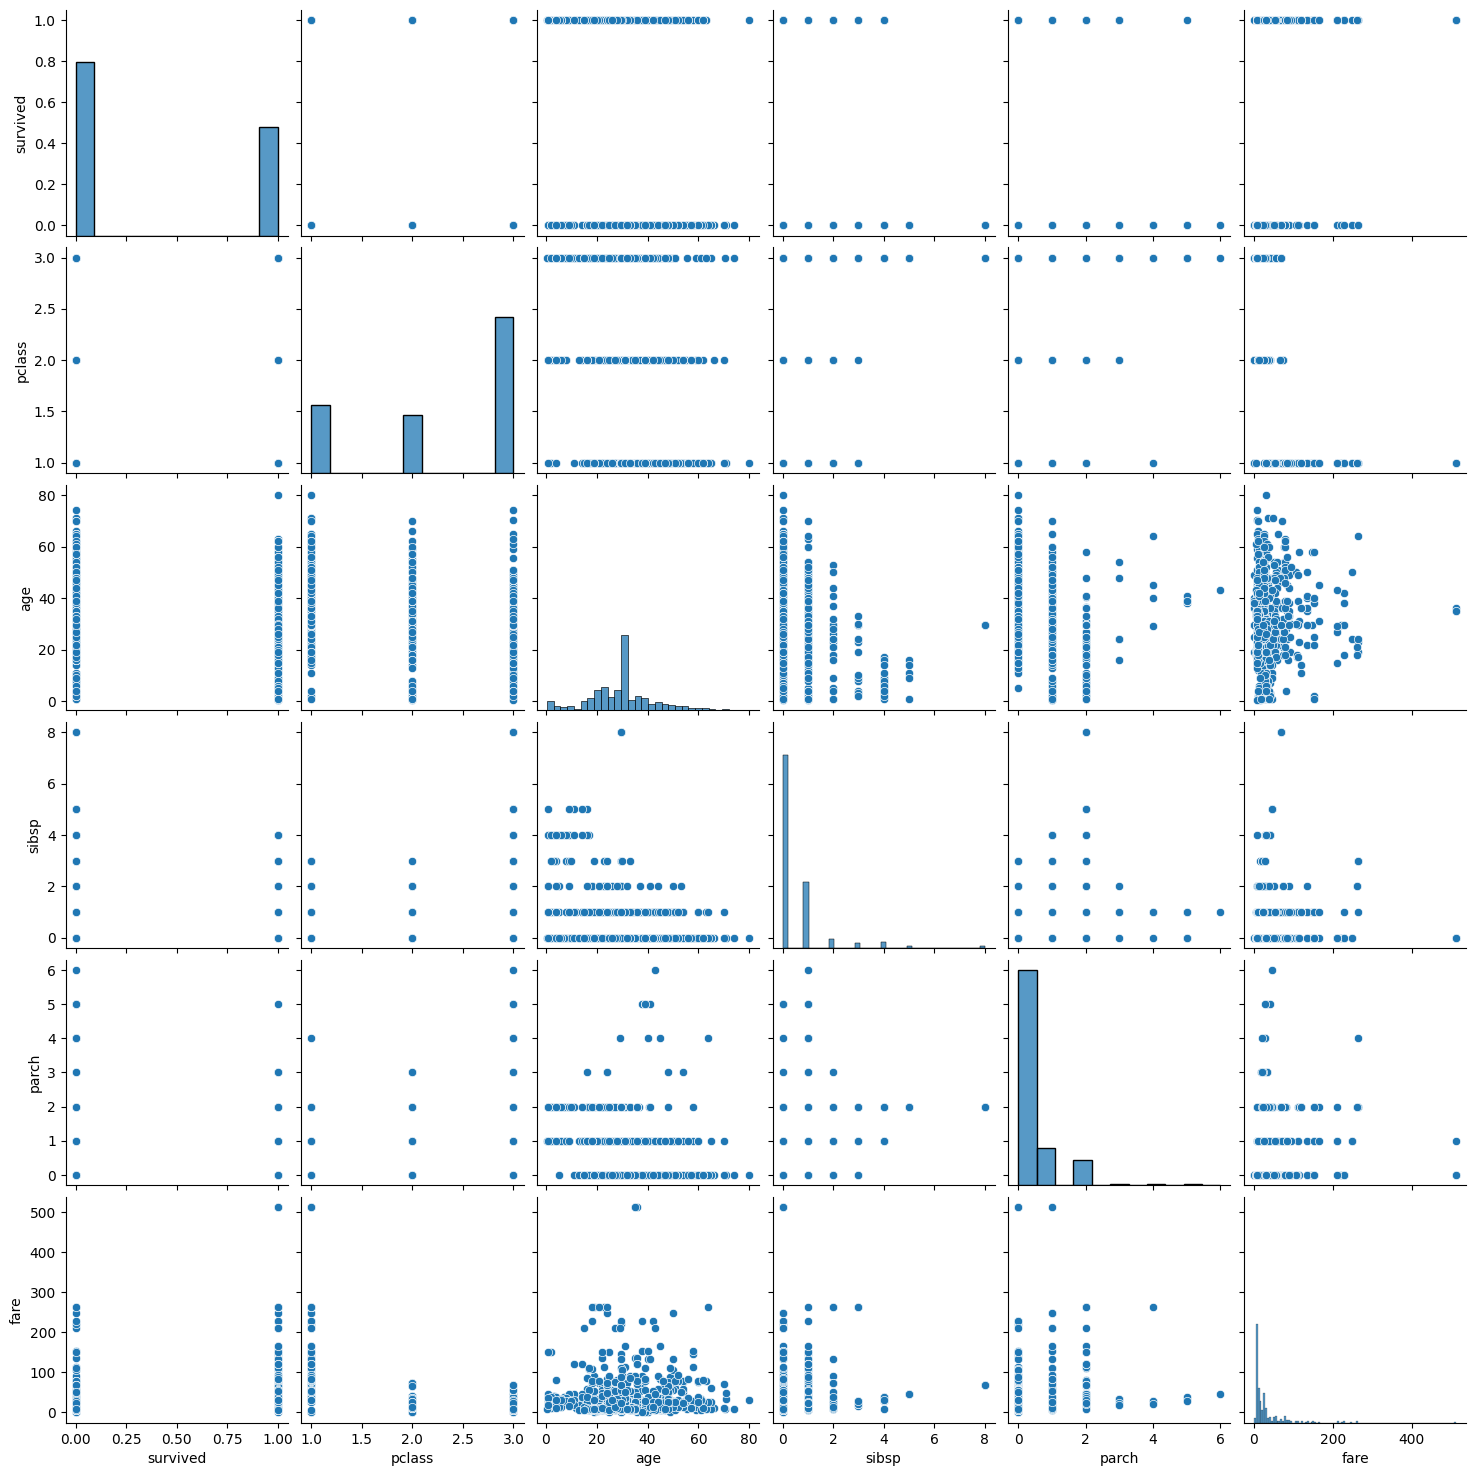

In [22]:
sns.pairplot(df2)
plt.show()

<h3>Grouped Statistics</h3>

<h4>What is the average age of survivors vs non-survivors ?</h4>

In [23]:
print("The average age of survivors: ",df[df['survived']==1]['age'].mean())
print("The average age of non-survivors: ",df[df['survived']==0]['age'].mean())

The average age of survivors:  28.549778121775027
The average age of non-survivors:  30.415099646415943


<h4>What is the median fare paid by each class (pclass)?</h4>

In [24]:
print("Median fare for class 1: ",df[df['pclass']==1]['fare'].median())
print("Median fare for class 2: ",df[df['pclass']==2]['fare'].median())
print("Median fare for class 3: ",df[df['pclass']==3]['fare'].median())

Median fare for class 1:  60.287499999999994
Median fare for class 2:  14.25
Median fare for class 3:  8.05


<h4>Which group had more variability in age: males or females?</h4>

In [25]:
a=df[df['sex']=='male']['age'].var()
b=df[df['sex']=='female']['age'].var()
if a>b:
    print("Men had more variability in age than women")
else:
    print("Women had more variability in age than men")

Men had more variability in age than women


<h4>What is the correlation between age and survival for each gender separately?</h4>

In [26]:
df3=df[df['sex']=='male']
data3=np.vstack([df3['age'],df3['fare']])
cov3=np.cov(data3)
cov_xy3=cov3[0,1]
print("The correlation between age and survival for males: ",cov_xy3)
df4=df[df['sex']=='female']
data4=np.vstack([df4['age'],df4['fare']])
cov4=np.cov(data4)
cov_xy4=cov4[0,1]
print("The correlation between age and survival for females: ",cov_xy4)

The correlation between age and survival for males:  42.24245391970445
The correlation between age and survival for females:  118.67767848135679


<h3>Open-Ended Insight</h3>

<h4>Which variable shows the highest relative variation? Use Coefficient of Variation.</h4>

In [29]:
for i in df2.columns:
    print(i,(df[i].std()/df[i].mean())*100)

survived 126.7701394005813
pclass 36.21485054499517
age 43.779129671519065
sibsp 210.84643737627636
parch 211.23440706670115
fare 154.30725278408497


In [33]:
print("Parch has the highest CV")

Parch has the highest CV


<h4>Who paid the highest fare and what class were they in?</h4>

In [ ]:
print(df[df['fare']==df['fare'].max()][['pclass','who']])

     pclass    who
258       1  woman
679       1    man
737       1    man


<h4>Are higher fares associated with higher survival rates? Use a grouped correlation or boxplot.</h4>

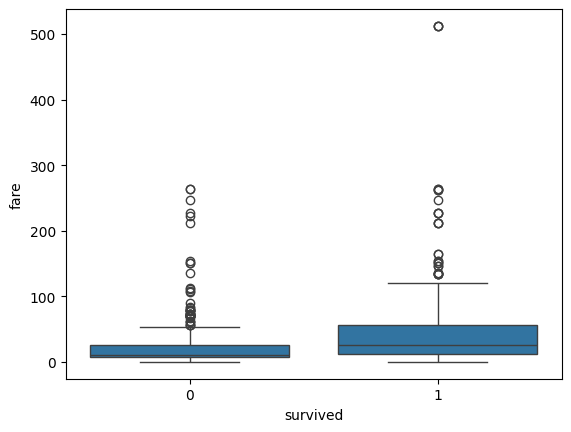

Yes, higher fares associated with higher survival rates


In [30]:
sns.boxplot(data=df,x=df['survived'],y=df['fare'])
plt.show()
print("Yes, higher fares associated with higher survival rates")

</h4>Which class had the lowest median age?</h4>

In [31]:
print("Median age of class 1: ",df[df['pclass']==1]['age'].median())
print("Median age of class 2: ",df[df['pclass']==2]['age'].median())
print("Median age of class 3: ",df[df['pclass']==3]['age'].median())

Median age of class 1:  35.0
Median age of class 2:  29.69911764705882
Median age of class 3:  29.69911764705882


In [32]:
print("Classes 2 and 3 have the lowest median age")

Classes 2 and 3 have the lowest median age
